<a href="https://colab.research.google.com/github/kk890528/python-work/blob/master/transfer_learning_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as sf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D, Activation,MaxPooling2D,MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data() 

#資料一使用cifar10資料集
###其分成10類
1.   'airplane'
2. 'automobile' 
3. 'bird'
4. 'cat'
5. 'deer'
6. 'dog'
7. 'frog'
8. 'horse' 
9. 'ship'
10. 'truck'

In [0]:
category= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

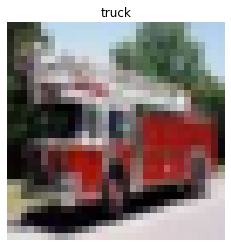

In [87]:
n = np.random.randint(X_train.shape[0])
X_sample = X_train[n]
y_sample = Y_train[n].squeeze()

plt.imshow(X_sample)
plt.title(category[y_sample])
plt.axis('off');

In [0]:

#將資料轉成0到1之間
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [89]:
X_train.shape

(50000, 32, 32, 3)

###圖片為32*32的矩陣

# 建立分類cifar10的神經網路
(先嘗試上課做法)

In [0]:
model = Sequential() 
model.add(Conv2D(32,(3,3),padding = "same",input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(512,(3,3),padding = "same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Flatten())
model.add(Dense(689))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       36992     
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 512)       590336    
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 512)      

In [0]:
model.compile(loss= "mse", optimizer = SGD(lr=0.001),metrics=['accuracy'])

In [93]:
model.fit(X_train,Y_train,batch_size = 100 ,epochs=5)

Epoch 1/5
500/500 [==============================] - 11s 23ms/step - loss: 0.0901 - accuracy: 0.1002
Epoch 2/5
500/500 [==============================] - 11s 23ms/step - loss: 0.0901 - accuracy: 0.1001
Epoch 3/5
500/500 [==============================] - 11s 23ms/step - loss: 0.0900 - accuracy: 0.1001
Epoch 4/5
500/500 [==============================] - 11s 23ms/step - loss: 0.0900 - accuracy: 0.1000
Epoch 5/5
500/500 [==============================] - 11s 23ms/step - loss: 0.0900 - accuracy: 0.0999


#模型預測

In [94]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 5ms/step - loss: 0.0900 - accuracy: 0.0995
Train Accuracy: 9.991999715566635
Test Accuracy: 9.950000047683716


###準確率太可怕(跟亂猜差不多)，還是用助教的方法

In [0]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [96]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [0]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

In [98]:
 model_2.fit(X_train,Y_train, 
           batch_size=128, 
           epochs=10,
          validation_data=(X_test, Y_test)
           )

Epoch 1/10
391/391 [==============================] - 6s 17ms/step - loss: 1.7638 - categorical_accuracy: 0.3374 - val_loss: 1.5889 - val_categorical_accuracy: 0.4139
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 1.4282 - categorical_accuracy: 0.4767 - val_loss: 1.2997 - val_categorical_accuracy: 0.5209
Epoch 3/10
391/391 [==============================] - 6s 16ms/step - loss: 1.2512 - categorical_accuracy: 0.5463 - val_loss: 1.2595 - val_categorical_accuracy: 0.5366
Epoch 4/10
391/391 [==============================] - 6s 16ms/step - loss: 1.1335 - categorical_accuracy: 0.5902 - val_loss: 1.1104 - val_categorical_accuracy: 0.6017
Epoch 5/10
391/391 [==============================] - 6s 16ms/step - loss: 1.0402 - categorical_accuracy: 0.6266 - val_loss: 1.0311 - val_categorical_accuracy: 0.6271
Epoch 6/10
391/391 [==============================] - 6s 17ms/step - loss: 0.9734 - categorical_accuracy: 0.6514 - val_loss: 0.9608 - val_categorical_accuracy: 0.654

In [99]:
score_train = model_2.evaluate(X_train, Y_train)
score_test = model_2.evaluate(X_test, Y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 4ms/step - loss: 0.8408 - categorical_accuracy: 0.7043
Train Accuracy: 72.65599966049194
Test Accuracy: 70.42999863624573


In [0]:
model_2.save_weights('LeNet5_CIFAR10_HW.h5')

#遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# Load fashion_mnist
(U_train, v_train0), (U_test, v_test0) = fashion_mnist.load_data()
# Normalize the range of featurs
U_train = U_train.reshape(60000,28,28,1)/255
U_test = U_test.reshape(10000,28,28,1)/255

# One-hot encoding
v_train = to_categorical(v_train0, 10)
v_test = to_categorical(v_test0, 10)

In [0]:
# fashion_minest 的圖片大小是 28x28，為黑白圖片所以只有1個 chanel，所以在此重新設定 CNN layer
CNN_layers = [Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

In [104]:
model_fashion = Sequential(CNN_layers+FC_layers)
model_fashion.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 512)         590336    
_________________________________________________________________
global_average_pooling2d_6 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)             

#與 model_2進行比較


In [105]:

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

#發現出了第一層因為更改輸入矩陣大小而改變，後面的權重維持不便

In [0]:
model_fashion.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

權重不變場合

In [0]:
for layer in CNN_layers:
    layer.trainable = False

In [108]:
 model_fashion.fit(U_train,v_train, 
           batch_size=128, 
           epochs=10,
          validation_data=(U_test, v_test)
           )

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.7448 - categorical_accuracy: 0.7306 - val_loss: 0.5327 - val_categorical_accuracy: 0.8082
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.4397 - categorical_accuracy: 0.8426 - val_loss: 0.3898 - val_categorical_accuracy: 0.8624
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3626 - categorical_accuracy: 0.8712 - val_loss: 0.3506 - val_categorical_accuracy: 0.8761
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3145 - categorical_accuracy: 0.8868 - val_loss: 0.3440 - val_categorical_accuracy: 0.8745
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2870 - categorical_accuracy: 0.8970 - val_loss: 0.2962 - val_categorical_accuracy: 0.8906
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2635 - categorical_accuracy: 0.9043 - val_loss: 0.2663 - val_categorical_accuracy: 0.905

In [109]:
score_train = model_fashion.evaluate(U_train, v_train)
score_test = model_fashion.evaluate(U_test, v_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2524 - categorical_accuracy: 0.9092
Train Accuracy: 92.82000064849854
Test Accuracy: 90.92000126838684


fine-tuing的場合

In [0]:
model_fashion.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

In [0]:
for layer in CNN_layers:
    layer.trainable = True

In [112]:
 model_fashion.fit(U_train,v_train, 
           batch_size=128, 
           epochs=10,
          validation_data=(U_test, v_test)
           )

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1765 - categorical_accuracy: 0.9369 - val_loss: 0.2301 - val_categorical_accuracy: 0.9182
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1716 - categorical_accuracy: 0.9380 - val_loss: 0.2253 - val_categorical_accuracy: 0.9194
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1683 - categorical_accuracy: 0.9389 - val_loss: 0.2301 - val_categorical_accuracy: 0.9172
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1657 - categorical_accuracy: 0.9408 - val_loss: 0.2301 - val_categorical_accuracy: 0.9184
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1649 - categorical_accuracy: 0.9408 - val_loss: 0.2246 - val_categorical_accuracy: 0.9205
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1624 - categorical_accuracy: 0.9414 - val_loss: 0.2293 - val_categorical_accuracy: 0.9205
Epoc

In [113]:
score_train = model_fashion.evaluate(U_train, v_train)
score_test = model_fashion.evaluate(U_test, v_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2276 - categorical_accuracy: 0.9194
Train Accuracy: 94.17833089828491
Test Accuracy: 91.93999767303467
